
# Tarefa 01 - Machine Learning 

Análise da Base de Dados [MNIST](http://yann.lecun.com/exdb/mnist/) de dígitos manuscritos.

### Leitura dos dados

Com os dados em formato csv ([Disponível em csv aqui](https://www.kaggle.com/oddrationale/mnist-in-csv)) no mesmo diretório que este notebook, vamos carregá-los:

In [0]:
import pandas as pd

df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

Com os dados carregados, vamos separar os **labels**.

In [0]:
y_train = df_train['label']
y_test = df_test['label']

df_train = df_train.drop(columns=['label'])
df_test = df_test.drop(columns=['label'])

df_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Aqui, cada coluna representa uma posição (x,y) da imagem, e seu valor representa o valor que seu pixel assume para aquela instância específica.

### Exploração Inicial

Vamos ver como os valores estão distribuídos:

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   503214.,
          469607.,   518723.,   611860.,  4118027.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

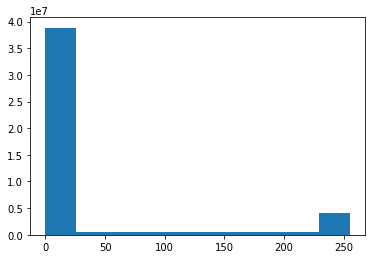

In [0]:
import matplotlib.pyplot as plt

pixel_values = []
for row in df_train:
    pixel_values.extend(df_train[row].tolist())
    
plt.hist(pixel_values)

Podemos ver que há uma grande concentração de valores em 0 e uma distribuição mais homogênea para os outros valores de pixel (nível de cinza) e, portanto é uma *distribuição assimétrica* com concentração a esquerda e cauda a direita.

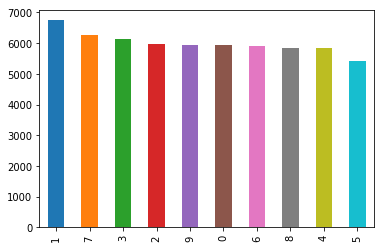

In [0]:
y_train.value_counts().plot(kind='bar')

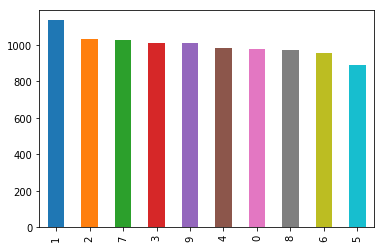

In [0]:
y_test.value_counts().plot(kind='bar')

Podemos ver que as classes não apresentam grande desbalanceamento.

### Normalização dos Dados

Para garantir que a técnica funcione adequadamente com os algoritmos de classificação que serão utilizados, realizamos a normalização dos dados. Existem [diversas formas](https://en.wikipedia.org/wiki/Feature_scaling#Standardization) de realizar essa transformação, mas como vimos que a distribuição dos valores aqui há uma forte assimetria e também por ser esparsa (muitos zeros), a solução mais adequada é o [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), que leva os valores para o intervalo de 0 a 1 baseando-se no valor mínimo e máximo encontrados e, desta forma, é menos sensível as pequenas mudanças dos dados quanto um [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) seria.

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

### Redução de Dimensionalidade

#### Análise de componentes principais (ACP)

O objetivo principal da técnica ACP é explicar a estrutura de variância e covariância de um conjunto de dados composto de p-variáveis alestórias, através da construção de combinações lineares das variáveis originais. Estas combinações lineares são chamadas de componentes principais e são não correlacionadas entre si. Se temos pvariáveis originais, é possível obter-se no máximo p componentes principais, no entanto, deseja-se obter um número menor de variáveis a serem avaliadas e utilizadas em um determinado tipo de modelagem, logo a técnica ACP sugere k (k<p) compoentes principais não correlacionadas. Desta forma, o sistema de variabilidade do conjunto de dados composto das p-variáveis originais, é aproximado pelo sistema de variabilidade das k componentes principais. A qualidade desta aproximação depende do número de componentes escolhidas e isto pode ser medido através da proporção de variância total (soma de todos os auto valores) explicada por essas componentes (soma dos autovalores respectivos aos componentes utilizados).  

Para a utilização desta técnica pode-se considerar a matriz de covariância ou correlação; e dos dados na forma natural, padronizada ou normalizada. Com tanto que no momento da redimensionalização, seja aplicada ao respectivo método utilizado Jonhson (1982). 

#### Análise linear discriminante (LDA)

Fisher introduziu a ideia de construir funções discriminantes a partir de combinações lineares da svariáveis originais, algo similiar ao que é utilizado na técnica ACP. Suponha que temos p-variáveis, c-classes normais p-variadas para discriminar e que as matrizes de covariância das classes sejam todas iguais. Neste caso é possível construir k combinações lineares, onde k <= min(c-1, p), chamadas de funções discriminantes linear. Dado a matriz de covariância resultante do produto cruzado das variâncias dentro das classes e entre as classes, análogas as variâncias da análise de variância multivariada. Onde pode ser mostrado que as combinações lineares são as de maior poder discriminante dentro do conjunto de variáveis utilizadas para discriminar. 

É interessante destacar que, embora a metodologia de funções discriminantes seja semelhante a de componentes principais, uma vez que ambas se fundamentam na construção de combinações lineares das variáveis originais, o processo de construção das combinações lineares é diferente e, ao contrário das componentes principais, as funções discriminantes são correlacionadas.

### Redução de Dimensionalidade

Vamos experimentar os resultados reduzindo os componentes de 784 para **9 componentes**, usando tanto o PCA (*Principal Component Analysis*) quanto o LDA (*Linear Discriminant Analysis*). Aqui é importante utilizar apenas os dados de treino para encontrar o plano para os componentes, e então aplicar o mesmo plano para os dados novos. 

In [0]:
from sklearn.decomposition import PCA
import time
start_time = time.time()

pca = PCA(n_components=9)
pca_ = pca.fit(df_train)
df_train_pca = pca_.transform(df_train)
df_test_pca = pca_.transform(df_test)

print("Total transformation execution time: %s seconds" % (time.time() - start_time))

Total transformation execution time: 9.762621402740479 seconds


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

start_time = time.time()

lda = LinearDiscriminantAnalysis(n_components=20)
lda_ = lda.fit(df_train, y_train)
df_train_lda = lda_.transform(df_train)
df_test_lda = lda_.transform(df_test)

print("Total transformation execution time: %s seconds" % (time.time() - start_time))

C:\Users\lipec\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\lipec\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Total transformation execution time: 40.61290144920349 seconds
Number of Components


In [0]:
df_train_lda.shape

(60000, 9)

## Modelagem

**Vamos utilizar dois algoritmos de classificação:** SVM e Random Forest.

### Random Forest 

Este é um algoritmo de [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning), particularmente se tratando de um algoritmo baseado em [*bagging*](https://en.wikipedia.org/wiki/Bootstrap_aggregating) conhecido como *feature bagging*, através do qual combina o resultado de múltiplas árvores de decisão (cada árvore é construída com um subset de features selecionadas aleatoriamente) para realizar sua classificação, como ilustrado pela imagem abaixo.

![logos](https://cdn-images-1.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
execution_times_rf = []
start_time = time.time()

rf_nothing = RandomForestClassifier().fit(df_train, y_train)

exec_time = time.time() - start_time
execution_times_rf.append(exec_time)
print("Total training execution time: %s seconds" % (exec_time))

Total training execution time: 14.501012802124023 seconds


In [0]:
start_time = time.time()

rf_pca = RandomForestClassifier().fit(df_train_pca, y_train)

exec_time = time.time() - start_time
execution_times_rf.append(exec_time)
print("Total training execution time: %s seconds" % (exec_time))

Total training execution time: 3.512590169906616 seconds


In [0]:
start_time = time.time()

rf_lda = RandomForestClassifier().fit(df_train_lda, y_train)

exec_time = time.time() - start_time
execution_times_rf.append(exec_time)
print("Total training execution time: %s seconds" % (exec_time))

Total training execution time: 3.967151403427124 seconds


### SVM (Support Vector Machine)

Support Vector Machine ([SVM](https://en.wikipedia.org/wiki/Support_vector_machine)) ou, em português, Máquina de Vetores de Suporte é um classificador *não-probabilístico, binário e linear*. Este modelo utiliza uma representação dos pontos no espaço  (em um hiperplano) para separar as categorias por um espaço que procura ser bem definido. Então, novas entradas são classificadas a depender de qual lado deste "espaço de separação" eles ficam no espaço do modelo.

In [0]:
from sklearn import svm

In [0]:
execution_times_svm = []
start_time = time.time()

svc_nothing = svm.SVC().fit(df_train, y_train)

exec_time = time.time() - start_time
execution_times_svm.append(exec_time)
print("Total training execution time: %s seconds" % (exec_time))

Total training execution time: 539.9836895465851 seconds


In [0]:
start_time = time.time()

svc_pca = svm.SVC().fit(df_train_pca, y_train)

exec_time = time.time() - start_time
execution_times_svm.append(exec_time)
print("Total training execution time: %s seconds" % (exec_time))

Total training execution time: 18.89071249961853 seconds


In [0]:
start_time = time.time()

svc_lda = svm.SVC().fit(df_train_lda, y_train)

exec_time = time.time() - start_time
execution_times_svm.append(exec_time)
print("Total training execution time: %s seconds" % (exec_time))

Total training execution time: 16.79820418357849 seconds


Muito bem, deu para perceber uma notória diferença em relação ao tempo de execução, mas vamos colocar isso em uma **visualização** para facilitar a interpretação final!

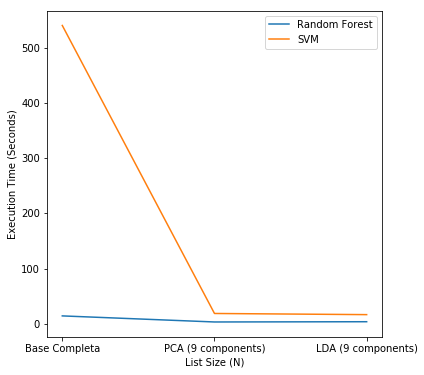

In [0]:
import matplotlib.pyplot as plt

execution_times = [execution_times_rf, execution_times_svm]
execution_times

df = pd.DataFrame.from_records(list(map(list, zip(*execution_times))), columns=['Random Forest', 'SVM'])
df.plot(figsize=(6,6))
plt.xticks(np.arange(3), ('Base Completa', 'PCA (9 components)', 'LDA (9 components)'))
plt.xlabel('List Size (N)')
plt.ylabel('Execution Time (Seconds)')

**Interpretação do Gráfico:** (INSERIR AQUI)

## Avaliando os modelos

Com os modelos já fittados, vamos separar as predições:

In [0]:
print("Start")
rf_nothing_predict = rf_nothing.predict(df_test) 
rf_pca_predict = rf_pca.predict(df_test_pca)
rf_lda_predict = rf_lda.predict(df_test_lda)
print("Predições Random Forest Realizadas")

Start
Predições Random Forest Realizadas


In [0]:
print("Start")
svc_pca_predict = svc_pca.predict(df_test_pca)
svc_lda_predict = svc_lda.predict(df_test_lda)
svc_nothing_predict = svc_nothing.predict(df_test)
print("Predições SVM Realizadas")

Start
Predições SVM Realizadas


Devemos utilizar algumas métricas para avaliar as predições realizadas. Por se tratar de um problema multiclasse, não é muito eficiente utilizar a curva ROC (e sua AUC) ainda mais por não ser um problema com grande desbalanceamento. Desta forma, as seguintes métricas serão utilizadas:
- **Matriz de Contingência:** Também conhecida como matriz de confusão, sua diagonal principal indica os valores corretamente classificados, e podemos inferir os FP (falsos positivos) e FN (falsos negativos) olhando os demais valores.
- **Acurácia:** Porcentagem de classificações corretas.
- **Recall¹:** Também conhecido como sensitividade, representa quanto dos objetos que deveriam ser classificados de uma classe foram corretamente classificados.
- **Precisão¹:** Dos identificados como positivos, quantos realmente são (porcentagem).
- **F1 Score¹:** Considera tanto a acurácia quanto a precisão para computar seu score ([2.precision.recall]/[precision+recall])

¹ As métricas assinaladas com (¹) foram originalmente desenhadas para problemas binários, para utilizá-las em um problema multiclasse foi realizada a média dessas métricas para cada classe.


Aqui definimos uma função que será reaproveitada para avaliar cada predição:

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
import os

def display_metrics(y_true, y_pred):
    width = os.get_terminal_size().columns
    print("---- \033[1m MATRIZ DE CONTINGÊNCIA \033[0m ----".center(width))
    print("")
    print(confusion_matrix(y_true, y_pred))
    print("")
    print("---- \033[1m OUTRAS MÉTRICAS \033[0m ----".center(width))
    print('Accuracy = ', accuracy_score(y_true, y_pred))
    print('Recall = ', recall_score(y_true, y_pred, average='weighted'))
    print('Precision = ', precision_score(y_true, y_pred, average='weighted'))
    print('F1 Score = ', f1_score(y_true, y_pred, average='weighted'))

In [0]:
display_metrics(y_test, rf_nothing_predict)

                                  ----  MATRIZ DE CONTINGÊNCIA  ----                                  

[[ 965    0    3    2    2    2    1    1    3    1]
 [   0 1123    4    3    0    1    2    0    2    0]
 [  12    1  979    9    3    1    6   11    7    3]
 [   4    1   24  940    0   19    1    8   11    2]
 [   3    0    2    3  943    1    7    1    2   20]
 [   5    3    2   29    3  831    5    3    7    4]
 [   9    2    4    1   11   10  918    0    2    1]
 [   2    7   19    2    5    1    0  969    7   16]
 [   4    1   10   21    9   15    8    4  889   13]
 [   8    4    5   10   28    8    1   10    6  929]]

                                     ----  OUTRAS MÉTRICAS  ----                                      
Accuracy =  0.9486
Recall =  0.9486
Precision =  0.9486707789651094
F1 Score =  0.9485291537839956


In [0]:
display_metrics(y_test, rf_pca_predict)

                                  ----  MATRIZ DE CONTINGÊNCIA  ----                                  

[[ 924    0    7    7    0   24   13    1    2    2]
 [   1 1115    4    2    1    0    6    0    6    0]
 [  14    2  953   10   13    3   13   12   11    1]
 [   5    3   14  894    3   22    1   11   50    7]
 [   2    2   15    1  818    5   16    5    6  112]
 [  25    1   13   37   10  760   12    4   24    6]
 [  17    6   17    1   15   12  883    1    3    3]
 [   2   14   17    5   16    6    0  930    3   35]
 [  12    0   23   66    9   32    5   12  788   27]
 [   7    8    4   21  123    9    7   32   20  778]]

                                     ----  OUTRAS MÉTRICAS  ----                                      
Accuracy =  0.8843
Recall =  0.8843
Precision =  0.8839404454217749
F1 Score =  0.8838991188431997


In [0]:
display_metrics(y_test, rf_lda_predict)

                                  ----  MATRIZ DE CONTINGÊNCIA  ----                                  

[[ 951    0    3    2    1    7   10    2    2    2]
 [   0 1101    6    3    2    2    2    1   18    0]
 [  10    7  929   22   11    5   14   11   21    2]
 [   6    2   20  898    0   34    1   20   22    7]
 [   2    1    7    3  906    1   12    4   10   36]
 [  13    4    6   50    8  753    9    9   33    7]
 [  19    2   10    2   14   20  885    1    4    1]
 [   3   13   21    7    9    2    0  932    3   38]
 [  14   17   12   33   17   46   12   10  805    8]
 [  13    2    2    8   60    6    1   36   20  861]]

                                     ----  OUTRAS MÉTRICAS  ----                                      
Accuracy =  0.9021
Recall =  0.9021
Precision =  0.9018664924592867
F1 Score =  0.9017713455107883


In [0]:
display_metrics(y_test, svc_nothing_predict)

                                  ----  MATRIZ DE CONTINGÊNCIA  ----                                  

[[ 967    0    2    0    0    5    4    1    1    0]
 [   0 1121    2    2    0    1    4    1    4    0]
 [   9    1  961    9   10    1   13    9   17    2]
 [   1    1   16  950    1   15    1   10   11    4]
 [   1    1    7    0  938    0    7    2    2   24]
 [   7    4    5   30    7  810   12    2   10    5]
 [   9    3    4    1    5    9  926    0    1    0]
 [   2   13   22    5    8    1    0  956    3   18]
 [   4    7    7   14    8   23   10    6  892    3]
 [   8    7    0   12   31    6    1   13    7  924]]

                                     ----  OUTRAS MÉTRICAS  ----                                      
Accuracy =  0.9445
Recall =  0.9445
Precision =  0.9444394542497412
F1 Score =  0.9443427882564515


In [0]:
display_metrics(y_test, svc_pca_predict)

                                  ----  MATRIZ DE CONTINGÊNCIA  ----                                  

[[ 952    0    4    4    1   10    6    1    2    0]
 [   0 1124    4    3    1    0    1    0    2    0]
 [  10    0  982    3    7    2   11    6   11    0]
 [   1    1    5  940    1   11    2   12   30    7]
 [   1    1    4    3  861    3    8    6    2   93]
 [   5    0    2   24    5  831    6    1   14    4]
 [  11    3    7    0    4    8  921    0    0    4]
 [   0    7   15    0    7    1    0  971    3   24]
 [   6    0   15   33   13   15    2    7  866   17]
 [   5    6    2   12   59   12    5   21   14  873]]

                                     ----  OUTRAS MÉTRICAS  ----                                      
Accuracy =  0.9321
Recall =  0.9321
Precision =  0.9320100183749562
F1 Score =  0.932008339815167


In [0]:
display_metrics(y_test, svc_lda_predict)

                                  ----  MATRIZ DE CONTINGÊNCIA  ----                                  

[[ 961    0    2    3    1    3    5    3    2    0]
 [   0 1113    3    5    1    3    1    0    9    0]
 [   7    6  950   15    9    4    8   15   17    1]
 [   2    3   21  911    0   32    0   10   25    6]
 [   0    0    6    0  923    0   12    5    7   29]
 [   7    2    5   38    6  789    6   10   28    1]
 [   9    3    9    1    8   19  906    0    3    0]
 [   2   11   21    7    3    0    0  950    3   31]
 [   7   15    7   26   13   28   10   11  851    6]
 [  10    4    2   12   42    6    0   21   11  901]]

                                     ----  OUTRAS MÉTRICAS  ----                                      
Accuracy =  0.9255
Recall =  0.9255
Precision =  0.9253227934197877
F1 Score =  0.9253319601629846


**Análise dos Resultados Obtidos:**
    
- Accuracy:
- Recall:
- Precision:
- F1 Score:

## Outras visualizações

Já foram apresentadas algumas visualizações anteriormente, mas como realizei mais algumas análises durante este processo, aqui estão outras visualizações e minhas interpretações a respeito das mesmas.

### Visualizando PCA e LDA

Vamos ver como ficam os dados em duas dimensões?

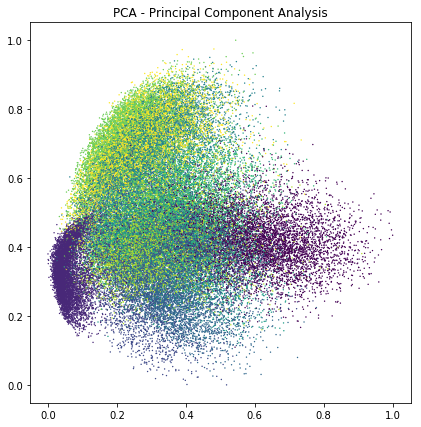

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis

def embedding_plot(X, title, y):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(7,7))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=2, c=y/10.)
    plt.title(title)
    
X_pca = decomposition.PCA(n_components=2).fit_transform(df_train)
embedding_plot(X_pca, "PCA - Principal Component Analysis", y_train)
plt.show()

C:\Users\lipec\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\lipec\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


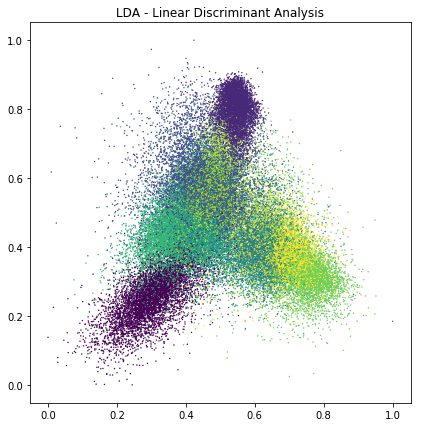

In [0]:
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(df_train, y_train)
embedding_plot(X_lda, "LDA - Linear Discriminant Analysis", y_train)
plt.show()

**Análise dos gráficos:** Podemos observar que, para a projeção dos nossos dados para duas dimensões (2 componentes PCA e 2 componentes LDA), a separação das classes não é tão visível no gráfico do PCA, enquanto a separação entre as classes é mais perceptível no gráfico do LDA. Desta forma, é possível concluir que há indícios de que a projeção obtida pelo LDA, neste caso, pode ser melhor para alguns algoritmos de classificação, uma vez que as classes estão mais agrupadas.

### Variância Explicada

Ao reduzir as dimensões, temos um elemento muito importante: a **variância explicada**.
- Explicar oq é a variância explicada

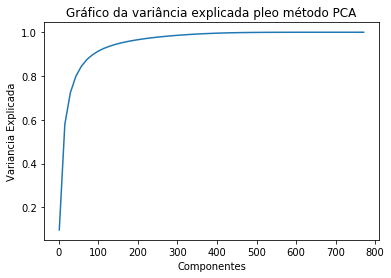

In [0]:
Var_Exp = []
x = df_train.copy()

for i in range(1,784,14):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    a=pca.explained_variance_ratio_
    Var_Exp.append(np.sum(a))

componentes = list(range(1,784,14))

plt.plot(componentes, Var_Exp)
plt.ylabel("Variancia Explicada")
plt.xlabel("Componentes")
plt.title('Gráfico da variância explicada pleo método PCA')
plt.show()

C:\Users\lipec\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\lipec\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


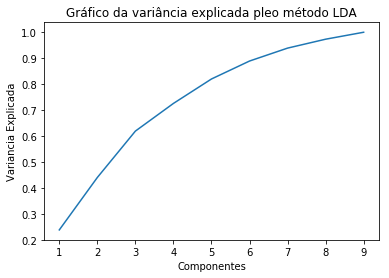

In [0]:
x = df_train
y = y_train
Var_Exp_LDA = []

for i in range(1,10,1):
    lda = LinearDiscriminantAnalysis(n_components = i)
    principalComponents_LDA = lda.fit_transform(x,y)
    a=lda.explained_variance_ratio_
    Var_Exp_LDA.append(np.sum(a))
    
components = list(range(1,10,1))
plt.plot(components,Var_Exp_LDA)
plt.ylabel("Variancia Explicada")
plt.xlabel("Componentes")
plt.title('Gráfico da variância explicada pleo método LDA')
plt.show()

**Análise dos gráficos:** (INSERIR AQUI)

## Conclusões sobre a base e sobre o trabalho

- A base é bem estruturada, com diversos exemplos dos dígitos manuscritos.
- A separação dos dados de treino e de teste é conveniente.
- Múltiplas técnicas conseguem classificar muito bem este problema.
- O uso de técnicas de redução de dimensionalidade funciona bem para estes dados, uma vez que os resultados obtidos com a redução de dimensões não foi tão inferior.